In [1]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,             # Y-axis tick labels font size
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 300,               # DPI for high-quality PNG/JPEG
})


In [2]:
import pandas as pd

In [3]:
df_train = pd.read_pickle("Model_Train.pkl")

df_train.head(1)

,img_id,img_origin,img_placement,nr_boil,polygons_boil,nr_pan,polygons_pan
0,IDUXSjTNlUQ59,D,openspace,[],[],"[14, 16]","[[(228.0551181102362, 277.6509186351706), (231..."


### placement classes

In [4]:
df_train["img_placement"].value_counts()

img_placement
roof           1846
S-unknown       441
openspace        86
r_openspace      66
Name: count, dtype: int64

roof: ID0aPQrc8JKq

S-unknown: IDihnQyEBse

openspace: IDcOcwyeab5c

r_openspace: IDEoTd4D6SZ30

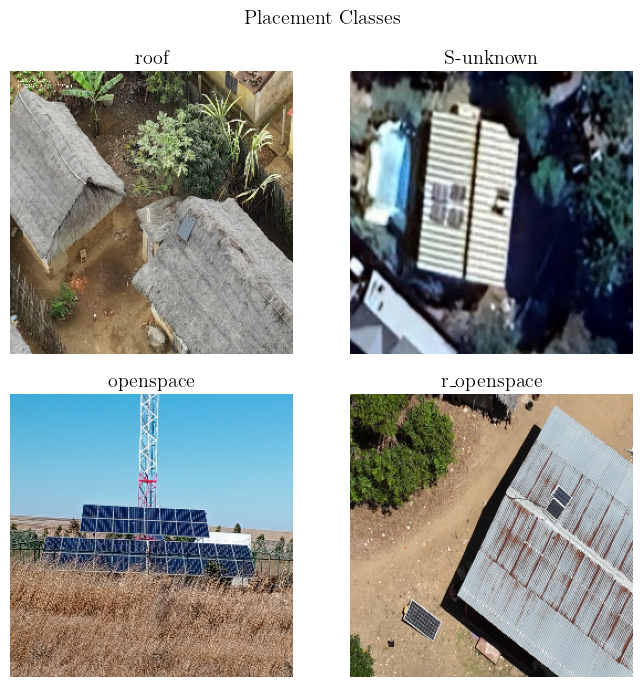

In [5]:
import matplotlib.pyplot as plt
import cv2

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

images = ["../CAA01_images/" + x + ".jpg" for x in ["ID0aPQrc8JKq", "IDihnQyEBse", "IDcOcwyeab5c", "IDEoTd4D6SZ30"]]

#normal color image rbg
images = [cv2.imread(x, cv2.IMREAD_COLOR) for x in images]
images = [cv2.cvtColor(x, cv2.COLOR_BGR2RGB) for x in images]
images = [cv2.resize(x, (256, 256)) for x in images]

placement = ["roof", "S-unknown", "openspace", "r_openspace"]

for i, ax in enumerate(axs.flat):
    ax.set_title(placement[i])
    ax.imshow(images[i])
    ax.axis('off')

fig.suptitle("Placement Classes")
plt.tight_layout()
#plt.savefig("assets/data_placement_classes.png", transparent=True)
plt.show()

### origin classes

In [6]:
df_train["img_origin"].value_counts()

img_origin
D    1998
S     441
Name: count, dtype: int64

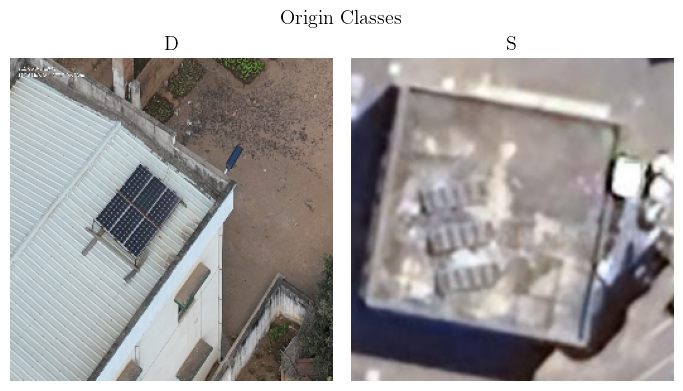

In [7]:
import matplotlib.pyplot as plt
import cv2

fig, axs = plt.subplots(1, 2, figsize=(7, 4))

images = ["../CAA01_images/" + x + ".jpg" for x in ["IDGUg29CZ1F", "ID9VLYl"]]
#normal color image rbg
images = [cv2.imread(x, cv2.IMREAD_COLOR) for x in images]
images = [cv2.cvtColor(x, cv2.COLOR_BGR2RGB) for x in images]
images = [cv2.resize(x, (256, 256)) for x in images]

placement = ["D", "S"]

for i, ax in enumerate(axs.flat):
    ax.set_title(placement[i])
    ax.imshow(images[i])
    ax.axis('off')

fig.suptitle("Origin Classes")
plt.tight_layout()
#plt.savefig("assets/data_origin_classes.png", transparent=True)

plt.show()

### polygons

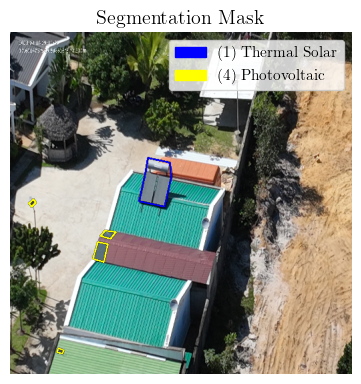

In [ ]:
import numpy as np

def polygons_to_segmentation_mask(polygons, image, val):
    for polygon in polygons:
        poly = np.array([polygon], dtype=np.int32)
        cv2.polylines(image, [poly], isClosed=True, color=val, thickness=2)
    return image

image = "ID1emKaMYPCA0XY"

img = cv2.imread(f"../CAA01_images/{image}.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (512, 512))

mask = np.zeros((512, 512, 4), dtype=np.uint8)
boils = df_train[df_train["img_id"] == image]["polygons_boil"].values[0]
pans = df_train[df_train["img_id"] == image]["polygons_pan"].values[0]

mask_boils = polygons_to_segmentation_mask(boils, mask.copy(), (0, 0, 255, 255))
mask_pans = polygons_to_segmentation_mask(pans, mask.copy(), (255, 255, 0, 255))

plt.Figure(figsize=(10, 10))
plt.imshow(img)
plt.imshow(mask_pans)
plt.imshow(mask_boils)
plt.axis('off')

import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color=(0, 0, 1), label='(1) Thermal Solar')
red_patch = mpatches.Patch(color=(1, 1, 0), label='(4) Photovoltaic')

plt.legend(handles=[green_patch, red_patch], loc='upper right')
plt.title("Segmentation Mask")
plt.tight_layout()
#plt.savefig("assets/data_segmentation_mask.png", transparent=True)

plt.show()

polygon challegns (todo torto vs multiplos)

In [9]:
all_ids = pd.read_pickle("images/Train_v02.pkl")
all_ids[all_ids["hows_polygon"] == "quase"].sample(1)

all_ids[all_ids["ID"] == "ID1Xl0vuApYXm"]

,ID,boil_nbr,pan_nbr,boil_polygon,pan_polygon,img_origin,placement,hows_polygon,hows_polygon_v2
88,ID1Xl0vuApYXm,[],"[21, 21, 21, 21, 21, 23, 22, 21]",[],"[[(2208.0, 3417.0), (465.0, 2223.0), (603.0, 2...",D,openspace,ok,ok


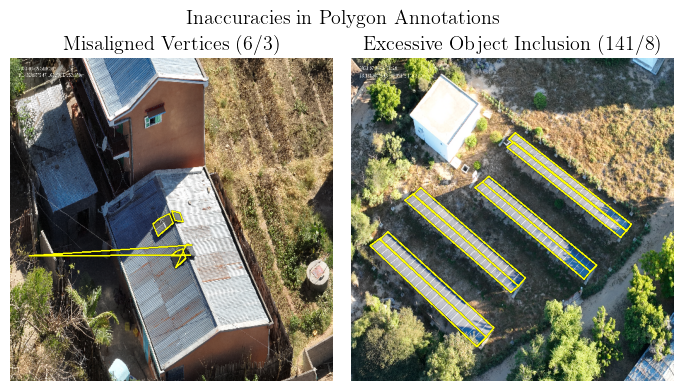

In [10]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image

fig, axs = plt.subplots(1, 2, figsize=(7, 4))

images = ["IDlYqTgLsPX0", "ID1Xl0vuApYXm"]
titles = ["Misaligned Vertices (6/3)", "Excessive Object Inclusion (141/8)"]

for i, ax in enumerate(axs.flat):

    image_name = images[i]
    img = cv2.imread(f"../CAA01_images/{image_name}.jpg", cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (512, 512))

    if i == 0:
        pans_ = [
            [(2003.0, 1421.0), (2107.0, 1440.0), (2147.0, 1523.0), (2044.0, 1506.0)],
            [(1772.0, 1546.0),
            (1839.0, 1499.0),
            (1969.0, 1447.0),
            (2023.0, 1530.0),
            (1938.0, 1584.0),
            (1833.0, 1653.0),
            (1799.0, 1597.0)],
            [(1995.0, 1838.0),
            (2062.0, 1793.0),
            (2137.0, 1774.0),
            (2179.0, 1861.0),
            (2116.0, 1907.0),
            (2050.0, 1950.0),
            (2182.0, 1730.0),
            (2250.0, 1735.0),
            (236.0, 1838.0),
            (2237.0, 1833.0)]
        ]
        pans = []
        img_ = Image.open(f"../CAA01_images/{image_name}.jpg").convert("RGB")
        size = img_.size
        for vertices in pans_:
            v_new = []
            for v1 in vertices:
                x = (v1[0]*512)/size[0]
                y = (v1[1]*512)/size[1]
                v_new.append((x,y))
            pans.append(v_new)        

        boils = []

    elif i == 1:
        boils = df_train[df_train["img_id"] == image_name]["polygons_boil"].values[0]
        pans = df_train[df_train["img_id"] == image_name]["polygons_pan"].values[0]
    mask = np.zeros((512, 512, 4), dtype=np.uint8)
    mask_boils = polygons_to_segmentation_mask(boils, mask.copy(), (0, 0, 255, 255))
    mask_pans = polygons_to_segmentation_mask(pans, mask.copy(), (255, 255, 0, 255))

    ax.set_title(titles[i])
    ax.imshow(img)
    ax.imshow(mask_pans)
    ax.imshow(mask_boils)
    ax.axis('off')

fig.suptitle("Inaccuracies in Polygon Annotations")
plt.tight_layout()
#plt.savefig("assets/data_poly_problems.png", transparent=True)

plt.show()

### pan vs boil (count) + distribution of panels per mask

In [11]:
df_train = pd.read_pickle("Model_Train.pkl")
df_train.sample(1)

,img_id,img_origin,img_placement,nr_boil,polygons_boil,nr_pan,polygons_pan
2407,IDAWQLIVXS,D,roof,[],[],[1],"[[(342.272, 248.14933333333335), (384.768, 235..."


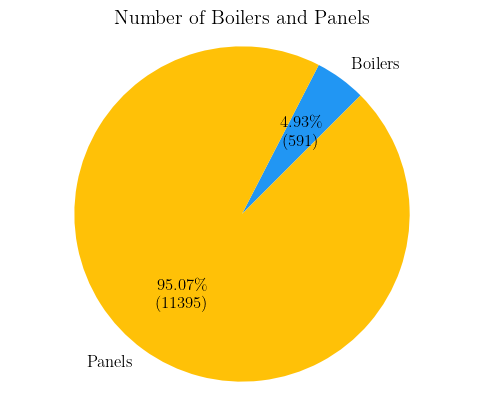

In [12]:
nr_boil = 0
nr_pan = 0
for i, row in df_train.iterrows():
    nr_boil += sum(row["nr_boil"])
    nr_pan += sum(row["nr_pan"])

import seaborn as sns

def autopct_format(pct, all_vals):
    total = sum(all_vals)
    count = int(round(pct * total / 100.0))  # Get the actual count
    return f'{pct:.2f}%\n({count})'

# pie chart
labels = 'Boilers', 'Panels'
sizes = [nr_boil, nr_pan]
colors = ['#2196F3','#FFC107']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct=lambda pct: autopct_format(pct, sizes), 
        startangle=45, textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.tight_layout()
plt.title("Number of Boilers and Panels")
#plt.savefig("assets/data_distribution.png", transparent=True)

plt.show()

In [13]:
nr_boil = {}
nr_pan = {}
for i, row in df_train.iterrows():
    for n in row["nr_boil"]:
        if n in nr_boil:
            nr_boil[n] += 1
        else:
            nr_boil[n] = 1
    for n in row["nr_pan"]:
        if n in nr_pan:
            nr_pan[n] += 1
        else:
            nr_pan[n] = 1


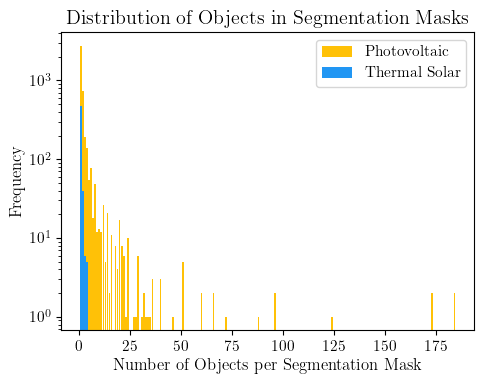

In [14]:
# Extract keys and values
keys = list(nr_pan.keys())
values = list(nr_pan.values())
plt.bar(keys, values, color='#FFC107', label="Photovoltaic")

keys = list(nr_boil.keys())
values = list(nr_boil.values())
plt.bar(keys, values, color='#2196F3', label="Thermal Solar")

# Labels and title
plt.xlabel("Number of Objects per Segmentation Mask")
plt.ylabel("Frequency")
plt.title("Distribution of Objects in Segmentation Masks")
plt.yscale('log')
plt.legend()
plt.tight_layout()
#plt.savefig("assets/data_objectdistribution.png", transparent=True)

# Show plot
plt.show()


# data augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


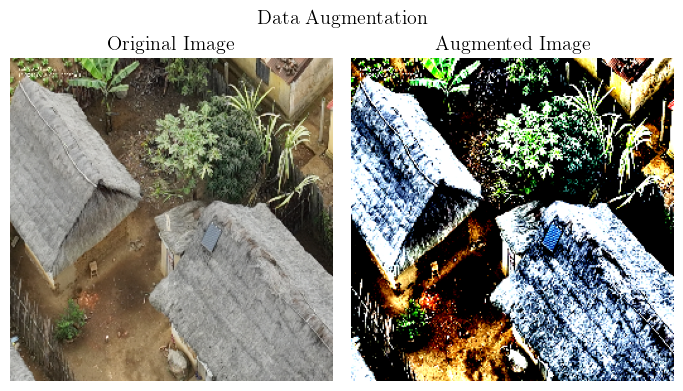

In [15]:
import matplotlib.pyplot as plt
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,             # Y-axis tick labels font size
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 300,               # DPI for high-quality PNG/JPEG
})


train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomCrop(height=256, width=256, p=1),
    A.VerticalFlip(p=1),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomRotate90(p=1),
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    A.CLAHE(clip_limit=4.0, p=0.5),
    A.HueSaturationValue(p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

fig, axs = plt.subplots(1, 2, figsize=(7, 4))

x = "../CAA01_images/" + "ID0aPQrc8JKq" + ".jpg"

for i, ax in enumerate(axs.flat):
    if i == 0:
        ax.set_title("Original Image")
        images = cv2.imread(x, cv2.IMREAD_COLOR)
        images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
        images = cv2.resize(images, (256, 256))
        ax.imshow(images)
        ax.axis('off')
    else:
        ax.set_title("Augmented Image")
        images = cv2.imread(x, cv2.IMREAD_COLOR)
        images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
        images = cv2.resize(images, (256, 256))
        images = train_transform(image=images)["image"]
        images = np.transpose(images, (1, 2, 0))
        ax.imshow(images)
        ax.axis('off')

fig.suptitle("Data Augmentation")
plt.tight_layout()
#plt.savefig("assets/data_augmentation.png", transparent=True)
plt.show()